# Introduction to AI
## Text and Speech Demos

### Basic Frequency Analysis

#### Load a Text Document

In [ ]:
# Use Curl to get a document from GitHub and open it
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Moon.txt -o Moon.txt
doc1 = open("Moon.txt", "r")

# Read the document and print its contents
doc1Txt = doc1.read()
print(doc1Txt)

#### Normalize the Text

In [ ]:
from string import punctuation

# remove numeric digits
txt = ''.join(c for c in doc1Txt if not c.isdigit())

# remove punctuation and make lower case
txt = ''.join(c for c in txt if c not in punctuation).lower()

# print the normalized text
print (txt)

#### Get the Frequency Distribution

In [ ]:
import nltk
import pandas as pd
from nltk.probability import FreqDist
nltk.download("punkt")

# Tokenize the text into individual words
words = nltk.tokenize.word_tokenize(txt)

# Get the frequency distribution of the words into a data frame
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']
print (count_frame)

#### Plot the distribution as a pareto chart

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Sort the data frame by frequency
counts = count_frame.sort_values('Count', ascending = False)

# Display the top 60 words as a bar plot
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

#### Remove stop words

In [ ]:
# Get standard stop words from NLTK
nltk.download("stopwords")
from nltk.corpus import stopwords

# Filter out the stop words
txt = ' '.join([word for word in txt.split() if word not in (stopwords.words('english'))])

# Get the frequency distribution of the remaining words
words = nltk.tokenize.word_tokenize(txt)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot the frequency of the top 60 words
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

### Term Frequency - Inverse Document Frequency
#### View the documents

In [ ]:
# remind ourselves of the first document
print(doc1Txt)
print("------------------------------------------------")

# Get a second document, normalize it, and remove stop words
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Gettysburg.txt -o Gettysburg.txt
doc2 = open("Gettysburg.txt", "r")
doc2Txt = doc2.read()
print (doc2Txt)
from string import punctuation
txt2 = ''.join(c for c in doc2Txt if not c.isdigit())
txt2 = ''.join(c for c in txt2 if c not in punctuation).lower()
txt2 = ' '.join([word for word in txt2.split() if word not in (stopwords.words('english'))])


# and a third
print("------------------------------------------------")
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Cognitive.txt -o Cognitive.txt
doc3 = open("Cognitive.txt", "r")
doc3Txt = doc3.read()
print (doc3Txt)
from string import punctuation
txt3 = ''.join(c for c in doc3Txt if not c.isdigit())
txt3 = ''.join(c for c in txt3 if c not in punctuation).lower()
txt3 = ' '.join([word for word in txt3.split() if word not in (stopwords.words('english'))])


#### Get TF-IDF Values for the top three words in each document

In [ ]:
# install textblob library and define functions for TF-IDF
!pip install -U textblob
import math
from textblob import TextBlob as tb

def tf(word, doc):
    return doc.words.count(word) / len(doc.words)

def contains(word, docs):
    return sum(1 for doc in docs if word in doc.words)

def idf(word, docs):
    return math.log(len(docs) / (1 + contains(word, docs)))

def tfidf(word, doc, docs):
    return tf(word,doc) * idf(word, docs)


# Create a collection of documents as textblobs
doc1 = tb(txt)
doc2 = tb(txt2)
doc3 = tb(txt3)
docs = [doc1, doc2, doc3]

# Use TF-IDF to get the three most important words from each document
print('-----------------------------------------------------------')
for i, doc in enumerate(docs):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, doc, docs) for word in doc.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:3]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))


### Stemming

#### View frequency of unstemmed words from Kennedy's inauguration speech

In [ ]:
# Load and print text
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Inaugural.txt -o Inaugural.txt
doc4 = open("Inaugural.txt", "r", encoding="utf-16")
doc4Txt = doc4.read()

print(doc4Txt)

# Normalize and remove stop words
from string import punctuation
doc4Txt = ''.join(c for c in doc4Txt if not c.isdigit())
doc4Txt = ''.join(c for c in doc4Txt if c not in punctuation).lower()
doc4Txt = ' '.join([word for word in doc4Txt.split() if word not in (stopwords.words('english'))])

# Get Frequency distribution
words = nltk.tokenize.word_tokenize(doc4Txt)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

#### Stem the words using the Porter stemmer

In [ ]:
from nltk.stem.porter import PorterStemmer

# Get the word stems
ps = PorterStemmer()
stems = [ps.stem(word) for word in words]

# Get Frequency distribution
fdist = FreqDist(stems)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

### Text Analytics
#### Create a Text Analytics service in Azure
https://portal.azure.com

#### Get the region-specific URI and Key

In [ ]:
textAnalyticsURI = 'YOUR_REGION.api.cognitive.microsoft.com'
textKey = 'YOUR_KEY'

#### Analyze the Gettysburg and Cognitive documents

In [ ]:
import http.client, urllib.request, urllib.parse, urllib.error, base64, json, urllib

# Define the request headers.
headers = {
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': textKey,
    'Accept': 'application/json'
}

# Define the parameters
params = urllib.parse.urlencode({
})

# Define the request body
body = {
  "documents": [
    {
        "language": "en",
        "id": "1",
        "text": doc2Txt
    },
    {
        "language": "en",
        "id": "2",
        "text": doc3Txt
    }
  ]
}

try:
    # Execute the REST API call and get the response.
    conn = http.client.HTTPSConnection(textAnalyticsURI)
    conn.request("POST", "/text/analytics/v2.0/keyPhrases?%s" % params, str(body), headers)
    response = conn.getresponse()
    data = response.read().decode("UTF-8")

    # 'data' contains the JSON response, which includes a collection of documents.
    parsed = json.loads(data)
    for document in parsed['documents']:
        print("Document " + document["id"] + " key phrases:")
        for phrase in document['keyPhrases']:
            print("  " + phrase)
        print("---------------------------")
    conn.close()

except Exception as e:
    print('Error:')
    print(e)

#### Perform sentiment analysis

In [ ]:
body = {
  "documents": [
    {
      "language": "en",
      "id": "1",
      "text": "Wow! cognitive services are fantastic."
    },
    {
      "language": "en",
      "id": "2",
      "text": "I hate it when computers don't understand me."
    }
  ]
}


try:
    conn = http.client.HTTPSConnection(textAnalyticsURI)
    conn.request("POST", "/text/analytics/v2.0/sentiment?%s" % params, str(body), headers)
    response = conn.getresponse()
    data = response.read().decode("UTF-8")
    parsed = json.loads(data)
    
    # Get the numeric score for each document
    for document in parsed['documents']:
        sentiment = "negative"
        
        # if it's more than 0.5, consider the sentiment to be positive.
        if document["score"] >= 0.5:
            sentiment = "positive"
        print("Document:" + document["id"] + " = " + sentiment)
    conn.close()
    
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))



### Speech
#### Create a Speech API service
https://portal.azure.com
#### Get the service key

In [ ]:
speechKey = 'YOUR_KEY'
speech_region = 'YOUR_REGION'

#### Get the audio input
We'll use a WAV file of captured audio containing the speech we want to transcribe

In [ ]:
import IPython

# Download the audio file
!curl https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/RainSpain.wav -o RainSpain.wav
    
# Play the audio
IPython.display.Audio('RainSpain.wav', autoplay=True)

#### Convert speech to text

In [ ]:
import IPython
import requests, json

with open("RainSpain.wav", mode="rb") as audio_file:
        audio_data =  audio_file.read()
        
# The Speech API requires an access token (valid for 10 mins)
apiEndPoint = "https://" + speech_region + ".api.cognitive.microsoft.com/sts/v1.0/issueToken"
apiKey = speechKey
headers = {"Ocp-Apim-Subscription-Key": apiKey}

# Use the API key to request an access token
response = requests.post(apiEndPoint, headers=headers)
accesstoken = str(response.text)

# Now that we have a token, we can set up the request
speechToTextEndPoint = "https://" + speech_region + ".stt.speech.microsoft.com/speech/recognition/conversation/cognitiveservices/v1"
headers = {"Content-type": "audio/wav; codec=audio/pcm; samplerate=16000", 
           "Authorization": "Bearer " + accesstoken}
params = {"language":"en-US"}
body = audio_data

# Connect to server, post the request, and get the result
response = requests.post(speechToTextEndPoint,data=body, params=params, headers=headers)
result = str(response.text)
print(json.loads(result)['DisplayText'])

#### Convert text to speech

In [ ]:
import IPython
import requests, json
from xml.etree import ElementTree

# Get the input text
myText = input('What would you like me to say?: \n')
        
# The Speech API requires an access token (valid for 10 mins)
apiEndPoint = "https://" + speech_region + ".api.cognitive.microsoft.com/sts/v1.0/issueToken"
apiKey = speechKey
headers = {"Ocp-Apim-Subscription-Key": apiKey}

# Use the API key to request an access token
response = requests.post(apiEndPoint, headers=headers)
accesstoken = str(response.text)

# Now that we have a token, we can set up the request
textToSpeechEndPoint = "https://" + speech_region + ".tts.speech.microsoft.com/cognitiveservices/v1"
headers = {"Content-type": "application/ssml+xml",
           'X-Microsoft-OutputFormat': 'riff-16khz-16bit-mono-pcm',
           'User-Agent': 'speech',
           "Authorization": "Bearer " + accesstoken}

# The request body is XML
body = "<speak version='1.0' xml:lang='en-US'>\
          <voice xml:lang='en-US'\
                 xml:gender='Female'\
                 name='Microsoft Server Speech Text to Speech Voice (en-US, ZiraRUS)'>" + myText + "</voice>\
        </speak>"


# Connect to server, post the request, and get the result
response = requests.post(textToSpeechEndPoint,data=body, headers=headers)

#Play the audio
IPython.display.Audio(response.content, autoplay=True)

### Translation

#### Create a Microsoft Translator Text  Service
https://portal.azure.com

#### Get the service key

In [ ]:
transTextKey = "YOUR_KEY_HERE"

#### Translate Text

In [ ]:
import requests, http.client, urllib.request, urllib.parse, urllib.error, base64, json, urllib
from xml.etree import ElementTree


textToTranslate = input('Please enter some text: \n')
fromLangCode = input('What language is this?: \n') 
toLangCode = input('To what language would you like it translated?: \n') 

try:
    # Connect to server to get the Access Token
    apiKey = transTextKey
    params = ""
    headers = {"Ocp-Apim-Subscription-Key": apiKey}
    AccessTokenHost = "api.cognitive.microsoft.com"
    path = "/sts/v1.0/issueToken"

    conn = http.client.HTTPSConnection(AccessTokenHost)
    conn.request("POST", path, params, headers)
    response = conn.getresponse()
    data = response.read()
    conn.close()
    accesstoken = "Bearer " + data.decode("UTF-8")


    # Define the request headers.
    headers = {
        'Authorization': accesstoken
    }

    # Define the parameters
    params = urllib.parse.urlencode({
        "text": textToTranslate,
        "to": toLangCode,
        "from": fromLangCode
    })

    # Execute the REST API call and get the response.
    conn = http.client.HTTPSConnection("api.microsofttranslator.com")
    conn.request("GET", "/V2/Http.svc/Translate?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    translation = ElementTree.fromstring(data.decode("utf-8"))
    print (translation.text)

    conn.close()
    
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

### Language Understanding Intelligence Service (LUIS)

#### Provision LUIS
https://portal.azure.com

#### Create a LUIS App
https://www.luis.ai/

Home automation app with a *Light* entity and the following intents:
- Light On
- Light Off


Please enter a command: 
bring clarity


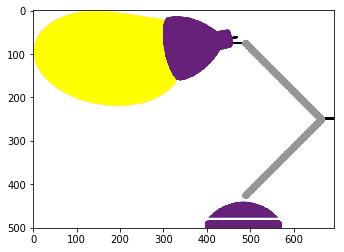

In [10]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import requests
from io import BytesIO
import json 

# Set up API configuration
endpointUrl = "https://westus.api.cognitive.microsoft.com/luis/v2.0/apps/d700a5da-9322-4e4f-8eac-8887c9b65e64?verbose=true&timezoneOffset=0&subscription-key=8d26268313b84bda98dfdfee1abb745d&q="

# prompt for a command
command = input('Please enter a command: \n')

# Call the LUIS service and get the JSON response
endpoint = endpointUrl + command.replace(" ","+")
response = requests.get(endpoint)
data = json.loads(response.content.decode("UTF-8"))

# Identify the top scoring intent
intent = data["topScoringIntent"]["intent"]
if (intent == "Light On"):
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOn.jpg'
elif (intent == "Light Off"):
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/LightOff.jpg'
else:
    img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/Dunno.jpg'

# Get the appropriate image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)
